In [104]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

dataset = pd.read_csv("dataset/titanic_data.csv")


In [105]:
# we will remove Name and Ticket columns as they don't provide any information

dataset.drop(['Name','Ticket'],axis=1,inplace=True)


In [106]:
# we will remove missing values
findMissingValues = dataset.isnull().sum()
findMissingValues[findMissingValues > 0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [107]:
#we will remove cabin as it has more than 75% of null values in dataset
dataset = dataset.drop('Cabin',axis=1)

###### we have removed cabin, now we have to fill the missing values in Age and Embarked column


In [108]:
# Fill the Age missing values with it's mean
dataset['Age'].fillna(dataset['Age'].mean(),inplace=True)

# Embarked has categorical data, so we will use mode to fill the null values
dataset['Embarked'].fillna(dataset['Embarked'].mode()[0],inplace=True)

In [109]:
# Check any null values are there
findMissingValues = dataset.isnull().sum()
findMissingValues[findMissingValues > 0]

Series([], dtype: int64)

In [110]:
dataset.dtypes[dataset.dtypes == 'object'].index

Index(['Sex', 'Embarked'], dtype='object')

#### we will perform one hot encoding on categorical data

In [111]:
dataset['Pclass'] = dataset['Pclass'].apply(str)


In [112]:
categoricalCol = dataset.dtypes[dataset.dtypes == 'object']
categoricalCol


Pclass      object
Sex         object
Embarked    object
dtype: object

In [113]:
#one hot encoding

for val in categoricalCol.index:    
    columns = pd.get_dummies(dataset.pop(val),prefix=val)
    columns.drop(columns.columns[len(columns.columns)-1], axis=1, inplace=True)
    dataset = pd.concat([dataset,columns],axis=1)

In [114]:
y = dataset.pop('Survived')
X = dataset

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [116]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
classifier = DecisionTreeClassifier()
print(classifier.fit(X_train,y_train))
predictions = classifier.predict(X_test)
accuracy_score(y_test,predictions)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


0.75

In [117]:

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7426624737945492

In [118]:

def tuningFunction(parameter,name):
    train_results = []
    test_results = []
    for max_depth in parameter:
        if name == 1:
            dt = DecisionTreeClassifier(max_depth = max_depth)
            dt.fit(X_train, y_train)
        if name == 2:
            dt = DecisionTreeClassifier(min_samples_split = max_depth)
            dt.fit(X_train, y_train)
        if name == 3:
            dt = DecisionTreeClassifier(min_samples_leaf = max_depth)
            dt.fit(X_train, y_train)
        if name == 4:
            dt = DecisionTreeClassifier(max_features = max_depth)
            dt.fit(X_train, y_train)
        train_pred = dt.predict(X_train)
        false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
        roc_auc = auc(false_positive_rate, true_positive_rate)
        # Add auc score to previous train results
        train_results.append(roc_auc)
        y_pred = dt.predict(X_test)
        false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
        roc_auc = auc(false_positive_rate, true_positive_rate)
        # Add auc score to previous test results
        test_results.append(roc_auc)
    from matplotlib.legend_handler import HandlerLine2D
    line1, = plt.plot(parameter, train_results, 'b', label='Train AUC')
    line2, = plt.plot(parameter, test_results, 'r', label='Test AUC')
    plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
    plt.ylabel('AUC score')
    plt.xlabel('Tree depth')
    plt.show()

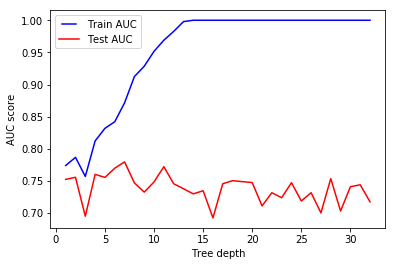

In [119]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
tuningFunction(max_depths,1)

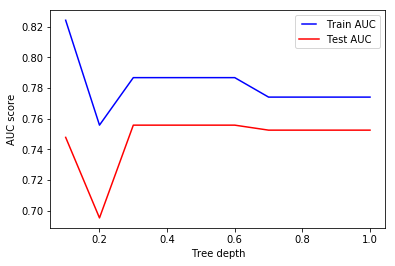

In [120]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
tuningFunction(min_samples_splits,2)

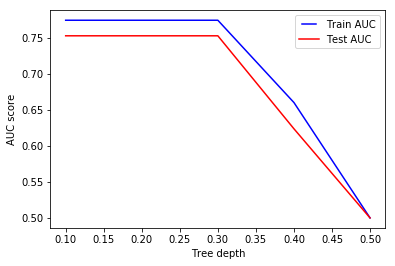

In [121]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
tuningFunction(min_samples_leafs,3)

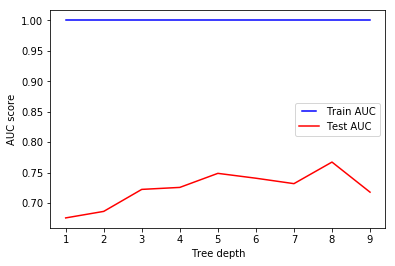

In [122]:
max_features = list(range(1,dataset.shape[1]))
tuningFunction(max_features,4)